In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
OA = gpd.read_file('D:\CASA\diss\spend locally\data\statistical-gis-boundaries-london\ESRI\OA_2011_London_gen_MHW.shp')
# the london boundaries dat
CP = pd.read_csv('D:\CASA\diss\spend locally\data\COICOP.CSV') # cp is the coicop dataset.

In [3]:
CP.drop(index = CP[CP.isnull().T.any()].index,axis=0,inplace=True)

In [4]:
CP['total'] = CP.iloc[:,3:].sum(axis=1)
col = list(CP.iloc[:,3:-1].columns.values)
for i in col:
    CP[i] = CP[i] / CP['total']

In [5]:
CP.drop(index = CP[CP['total'] == 0].index, axis=0, inplace = True)

In [7]:
regional = ['OA','Clothing','Footwear','Furniture, Furnishings & Floorcoverings','Household Textiles','Household Hardware',
            'Glassware, Tableware and Household Utensils','Tools & Equipment for House & Garden',
            'Purchase of vehicles','Operation of Cars, Vans & Motorcycles','Telephone and Fax Equipment',
            'A/V, Photographic, Computing Equipment','Recreational Durables','Recreational Items','Recreational Services',
           'Financial services not elsewhere classified','Medical Products, Appliances & Equipment'
           ]

In [8]:
CP_regional = CP[regional]
OA_col=['OA11CD', 'LSOA11NM','MSOA11NM','WD11NM_BF', 'geometry' ]
OA = OA[OA_col]
CPR_OA = pd.merge(CP_regional, OA, left_on = 'OA', right_on = 'OA11CD', how = 'left')

D:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

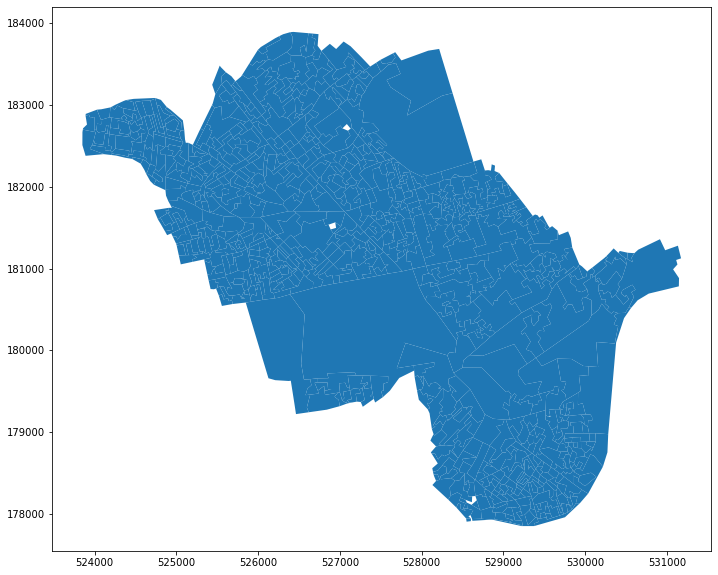

In [9]:
CPR_OA = gpd.GeoDataFrame(CPR_OA,crs='epsg:27700')
fig, axes = plt.subplots(1,1, figsize=(12,10))
CPR_OA.plot(ax=axes)           ## the distribution of data

In [10]:
CPR_OA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 779 entries, 0 to 778
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   OA                                           779 non-null    object  
 1   Clothing                                     779 non-null    float64 
 2   Footwear                                     779 non-null    float64 
 3   Furniture, Furnishings & Floorcoverings      779 non-null    float64 
 4   Household Textiles                           779 non-null    float64 
 5   Household Hardware                           779 non-null    float64 
 6   Glassware, Tableware and Household Utensils  779 non-null    float64 
 7   Tools & Equipment for House & Garden         779 non-null    float64 
 8   Purchase of vehicles                         779 non-null    float64 
 9   Operation of Cars, Vans & Motorcycles        779 non-null

## Test before Factor analysis

In [11]:
CPR_OA.columns.values

array(['OA', 'Clothing', 'Footwear',
       'Furniture, Furnishings & Floorcoverings', 'Household Textiles',
       'Household Hardware',
       'Glassware, Tableware and Household Utensils',
       'Tools & Equipment for House & Garden', 'Purchase of vehicles',
       'Operation of Cars, Vans & Motorcycles',
       'Telephone and Fax Equipment',
       'A/V, Photographic, Computing Equipment', 'Recreational Durables',
       'Recreational Items', 'Recreational Services',
       'Financial services not elsewhere classified',
       'Medical Products, Appliances & Equipment', 'OA11CD', 'LSOA11NM',
       'MSOA11NM', 'WD11NM_BF', 'geometry'], dtype=object)

In [27]:
CPR_fa = CPR_OA.iloc[:, 1:17]

### 1. Adequacy test

In [31]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.factor_analyzer import calculate_kmo

In [32]:
chi_square_value, p_value = calculate_bartlett_sphericity(CPR_fa)
chi_square_value,p_value

(32804.97277336235, 0.0)

In [33]:
kmo_all, kmo_model = calculate_kmo(CPR_fa)
print(kmo_model)

0.7604435196353078


D:\python\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


### 2. Select the appropriate number of factors

In [34]:
import seaborn as sns

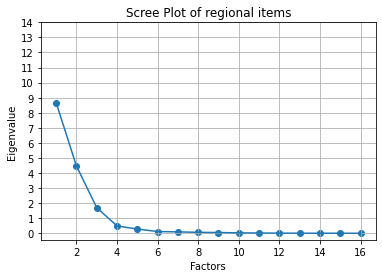

In [35]:
fa = FactorAnalyzer(25,rotation=None)
fa.fit(CPR_fa)

ev,v = fa.get_eigenvalues()
# visualisation
# plot is the number of indicators on the horizontal axis and the ev value on the vertical axis
# scatter is the number of indicators on the horizontal axis and the ev value on the vertical axis

plt.scatter(range(1,CPR_fa.shape[1]+1,1),ev)
plt.plot(range(1,CPR_fa.shape[1]+1,1),ev)
plt.title('Scree Plot of regional items')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.yticks(np.arange(0,15,1))
plt.grid()
plt.savefig("Scree Plot of regional items.jpg",dpi=200, bbox_inches = 'tight')
plt.show()

## total variance explained

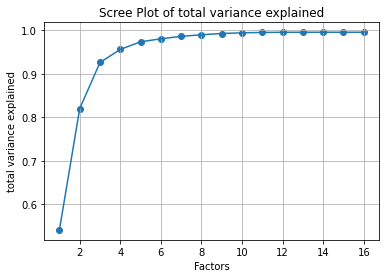

In [36]:
var = fa.get_factor_variance()
plt.scatter(range(1,CPR_fa.shape[1]+1,1),var[2])
plt.plot(range(1,CPR_fa.shape[1]+1,1),var[2])
plt.title('Scree Plot of total variance explained')
plt.xlabel('Factors')
plt.ylabel('total variance explained')
#plt.yticks(np.arange(0,15,1))
plt.grid()
plt.savefig("Scree Plot of total variance explained.jpg",dpi=200, bbox_inches = 'tight')
plt.show()

In [37]:
var = fa.get_factor_variance()
var

(array([8.66082737e+00, 4.45804852e+00, 1.69430873e+00, 4.82019504e-01,
        2.77701350e-01, 1.11633625e-01, 8.94572309e-02, 5.92097522e-02,
        4.56135075e-02, 2.51421179e-02, 1.35523494e-02, 6.40336526e-03,
        7.50706415e-04, 3.49082231e-04, 0.00000000e+00, 0.00000000e+00]),
 array([5.41301710e-01, 2.78628033e-01, 1.05894296e-01, 3.01262190e-02,
        1.73563344e-02, 6.97710156e-03, 5.59107693e-03, 3.70060951e-03,
        2.85084422e-03, 1.57138237e-03, 8.47021836e-04, 4.00210329e-04,
        4.69191509e-05, 2.18176394e-05, 0.00000000e+00, 0.00000000e+00]),
 array([0.54130171, 0.81992974, 0.92582404, 0.95595026, 0.97330659,
        0.98028369, 0.98587477, 0.98957538, 0.99242622, 0.99399761,
        0.99484463, 0.99524484, 0.99529176, 0.99531358, 0.99531358,
        0.99531358]))

## Factor analysis

Text(0.5, 69.0, 'common factors')

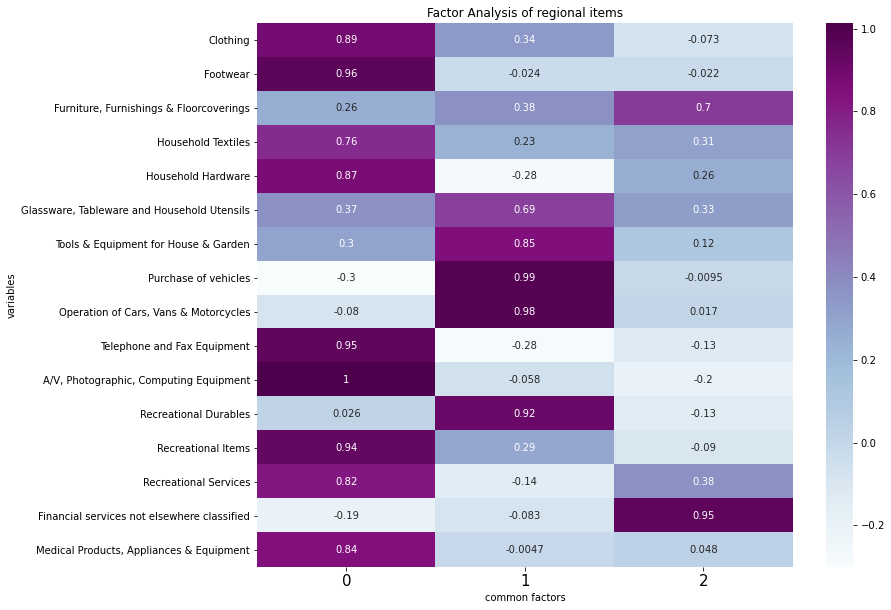

In [40]:
faR = FactorAnalyzer(3, rotation="oblimin")
faR.fit(CPR_fa)

CPR_CM = pd.DataFrame(faR.loadings_,index=xx.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(CPR_CM,annot=True,cmap='BuPu',ax=ax)

ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis of regional items",fontsize=12)
ax.set_ylabel("variables")
ax.set_xlabel("common factors")
#fig.savefig("Factor Analysis of regional items.jpg",dpi=200, bbox_inches = 'tight')

In [24]:
faR.get_factor_variance() ### the variance expained

(array([7.67467443, 4.54490645, 1.91915949]),
 array([0.47966715, 0.28405665, 0.11994747]),
 array([0.47966715, 0.76372381, 0.88367127]))

## Calculating factor scores

In [26]:
ScoreR = pd.DataFrame(faR.transform(CPR_fa))
ScoreR['oa'] = CPR_OA['OA']
ScoreR['geometry'] = CPR_OA['geometry']

In [27]:
ScoreR = gpd.GeoDataFrame(ScoreR,crs='epsg:27700')

D:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  """Entry point for launching an IPython kernel.


In [28]:
ScoreR.columns = ['region_1','region_2','region_3','oa','geometry']

In [29]:
ScoreR.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   region_1  779 non-null    float64 
 1   region_2  779 non-null    float64 
 2   region_3  779 non-null    float64 
 3   oa        779 non-null    object  
 4   geometry  779 non-null    geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 30.6+ KB


## Clustering

In [85]:
score = ScoreR.drop(columns = ['geometry','oa'], axis=1)

In [87]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()
score = ss.fit_transform(score)

D:\python\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


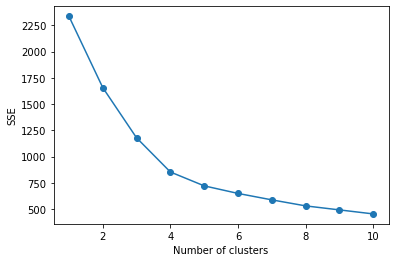

In [89]:
# calculate SSE for a range of number of cluster

list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(score)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.savefig("Elbow method.jpg",dpi=200, bbox_inches = 'tight')
plt.show()

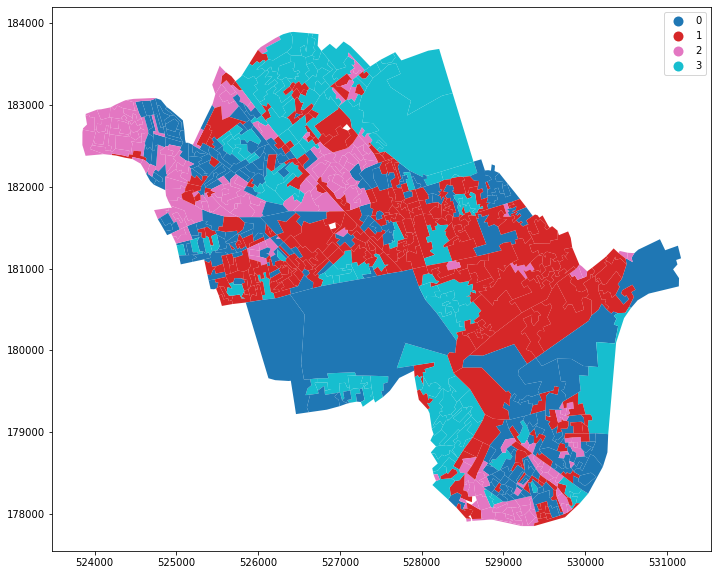

In [156]:

fig,ax = plt.subplots(figsize=(12,10))
k_cluster = 4
kmeans_method = KMeans(n_clusters=k_cluster,random_state=10)
kmeans_method.fit(score)
ScoreR['Kmeans_Cluster'] = kmeans_method.labels_



ScoreR.plot(ax = ax, column='Kmeans_Cluster', categorical=True, legend=True, figsize=(12,8));
fig.savefig("cluster.jpg",dpi=200, bbox_inches = 'tight')

In [157]:
l0 = ScoreR[ScoreR['Kmeans_Cluster'] == 0].mean()
l1 = ScoreR[ScoreR['Kmeans_Cluster'] == 1].mean()
l2 = ScoreR[ScoreR['Kmeans_Cluster'] == 2].mean()
l3 = ScoreR[ScoreR['Kmeans_Cluster'] == 3].mean()

In [158]:
ll = pd.concat([l0, l1, l2,l3], axis=1)

In [159]:
ll  #### the center of each cluster

,0,1,2,3
region_1,-0.174108,-0.949509,1.398681,0.182462
region_2,0.193926,-0.526217,-0.610141,1.716941
region_3,1.090996,-0.749629,0.009388,-0.345578
Kmeans_Cluster,0.000000,1.000000,2.000000,3.000000


In [109]:
ScoreR.to_file('factorscore.geojson', driver='GeoJSON') #save the data for plotting in R

## Acorn 

In [164]:
acorn = pd.read_csv('D:\CASA\diss\spend locally\data\Acorn.csv')
pos= pd.read_csv('D:\CASA\diss\spend locally\data\london_postcode.csv')
pos['pcd'] = pos['pcd'].str.replace(' ','')
acorn['Postcode'] = acorn['Postcode'].str.replace(' ','')
col = ['pcd','oa11']
pos=pos[col]
acorn = pd.merge(acorn, pos, left_on = 'Postcode', right_on = 'pcd', how = 'left')
acorn.drop(columns = ['Large User','Deleted Flag'], axis=1,inplace = True)
acorn.drop(columns = 'pcd', axis=1,inplace = True)
acorn = acorn.dropna(axis = 0, subset = ['Acorn Type'] )

acorn=acorn.drop(index = acorn[acorn['Acorn Group']== 'R'].index, axis=0)
acorn_oa = acorn.groupby('oa11')['Acorn Type'].agg(lambda x:x.value_counts().index[0])
acorn_oa = pd.merge(acorn_oa, OA,how = 'left',left_index=True, right_on='OA11CD')
acorn_oa = gpd.GeoDataFrame(acorn_oa, crs='epsg:27700')


D:\python\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\python\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.


In [303]:
acorn_oa = pd.merge(acorn_oa, ScoreR, left_on = 'OA11CD', right_on = 'oa', how = 'left') 

In [308]:
acorn_oa['Acorn Type'].value_counts()  

16.0    254
15.0    207
54.0    160
2.0      54
17.0     42
55.0     29
53.0     11
36.0      5
1.0       4
14.0      4
20.0      3
59.0      1
34.0      1
46.0      1
Name: Acorn Type, dtype: int64

In [309]:
ee = [16,15,54,2,17,55] #remove the acorn type with number fewer than 15
acorn_oa.drop(index = acorn_oa[~acorn_oa['Acorn Type'].isin(ee)].index, axis=0, inplace=True)

In [310]:
pd.pivot_table(acorn_oa, index=['Kmeans_Cluster'], values = ['region_1'], columns='Acorn Type',aggfunc=['count']) 
###Showing the percentage of each acorn type

count                                 
               region_1                                 
Acorn Type         2.0    15.0   16.0  17.0   54.0  55.0
Kmeans_Cluster                                          
0                   1.0   51.0  103.0  37.0   16.0   NaN
1                   6.0  149.0   85.0   3.0   11.0   NaN
2                   NaN    2.0    3.0   2.0  133.0  29.0
3                  47.0    5.0   63.0   NaN    NaN   NaN